# **Practical Seminar 1**

In [6]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [3]:
# for nicer plot
plt.style.use('seaborn')

In [5]:
# load audio
filename = '/content/OSR_us_000_0010_8k.wav'
signal, sample_rate = librosa.load(filename, sr = None)

In [13]:
signal_length = signal.shape[0]
signal_duration = (1.0/sample_rate)*signal_length
print('Sampling rate: {} Hz'.format(sample_rate))
print('Duration: {} seconds'.format(signal_duration))

Sampling rate: 8000 Hz
Duration: 33.623125 seconds


Text(0, 0.5, 'Amplitude')

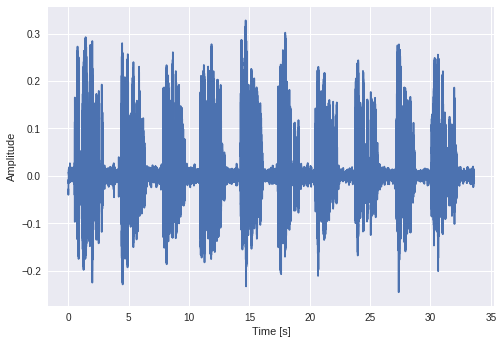

In [16]:
# plot audio signal
t_instants = np.arange(0,signal_length)*(1/sample_rate)

plt.plot(t_instants, signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

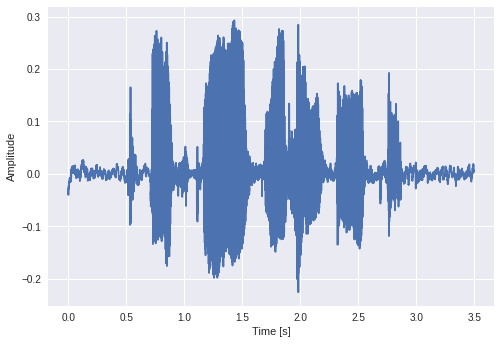

In [17]:
# cropped audio
final_duration = 3.5
signal = signal[0:int(final_duration*sample_rate)] # cropped signal
t_instants = np.arange(0, signal.shape[0])*(1/sample_rate)

plt.plot(t_instants, signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

In [18]:
# listen to audio
ipd.Audio(signal,rate=sample_rate)

## Short-Time Fourier Transform (STFT)
Implement manually functions and then use librosa

In [20]:
# Size of window and hop in samples
frame_length = 512
hop_length = 256

# Final number of frames
signal_length = len(signal)

num_frames = int((signal_length - frame_length)/hop_length) + 1
print('Number of frames: {}'.format(num_frames))

Number of frames: 108


In [23]:
inframe_ind = np.tile(np.arange(0, frame_length), (num_frames, 1)).T
print(inframe_ind.shape)
print(inframe_ind)
# The matrix has as many columns as the number of frames 
# and as many rows as the window length
# Each coluns goes from 0 to 511 (indeces within each window)

(512, 108)
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [509 509 509 ... 509 509 509]
 [510 510 510 ... 510 510 510]
 [511 511 511 ... 511 511 511]]


In [25]:
frame_ind = np.tile(np.arange(0, num_frames*hop_length, hop_length), (frame_length, 1))
print(frame_ind.shape)
print(frame_ind)
# Dimension as previous matrix, contains the start index of each frame

(512, 108)
[[    0   256   512 ... 26880 27136 27392]
 [    0   256   512 ... 26880 27136 27392]
 [    0   256   512 ... 26880 27136 27392]
 ...
 [    0   256   512 ... 26880 27136 27392]
 [    0   256   512 ... 26880 27136 27392]
 [    0   256   512 ... 26880 27136 27392]]


In [26]:
indices = inframe_ind + frame_ind
print(indices)
# Matrix of specific indices

[[    0   256   512 ... 26880 27136 27392]
 [    1   257   513 ... 26881 27137 27393]
 [    2   258   514 ... 26882 27138 27394]
 ...
 [  509   765  1021 ... 27389 27645 27901]
 [  510   766  1022 ... 27390 27646 27902]
 [  511   767  1023 ... 27391 27647 27903]]


In [27]:
frames = signal[indices]

frames.shape

(512, 108)

In [29]:
# start time of each window
t_frames = np.arange(0,num_frames)*(hop_length/sample_rate)
# end time of each window
t_frames_end = t_frames = frame_length*(1/sample_rate)
# center time of each window
t_frames_ctr = 0.5*(t_frames + t_frames_end)

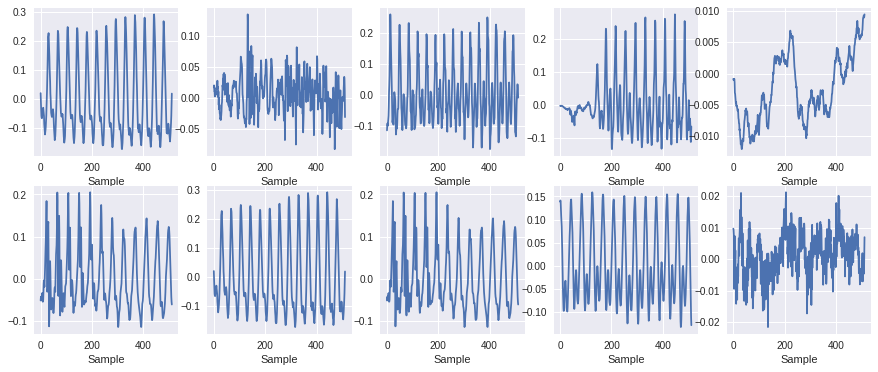

In [30]:
# plot frames
randwins = np.random.randint(0,num_frames-1,10)
plt.figure(figsize=(15,6))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.plot(frames[:, randwins[i]])
  plt.xlabel('Sample')

(512,)

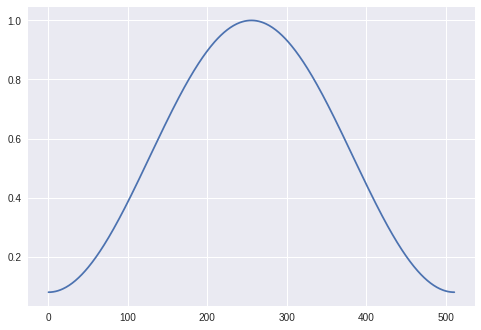

In [46]:
# Generate and apply a window function
winfunc = np.hamming(frame_length)
plt.plot(winfunc)
winfunc.shape

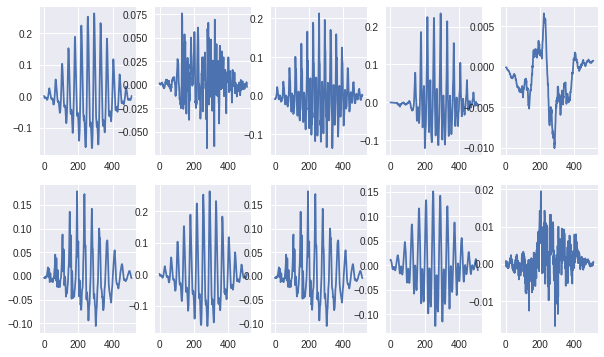

In [47]:
from locale import windows_locale
winfunc = np.expand_dims(winfunc, 1)
wframes = frames*winfunc
plt.figure(figsize=(10,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.plot(wframes[:, randwins[i]])

In [49]:
NFFT = 512
mag_frames = np.abs(np.fft.rfft(wframes, NFFT, axis = 0))
pow_frames = (mag_frames)**2
Nbins = mag_frames.shape[0]
print(Nbins)

257


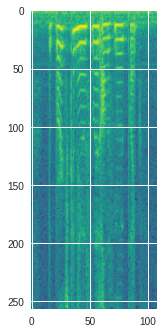

In [55]:
f_bins = np.arange(0,Nbins)*sample_rate/NFFT
plt.imshow(10*np.log10(pow_frames), cmap='viridis')

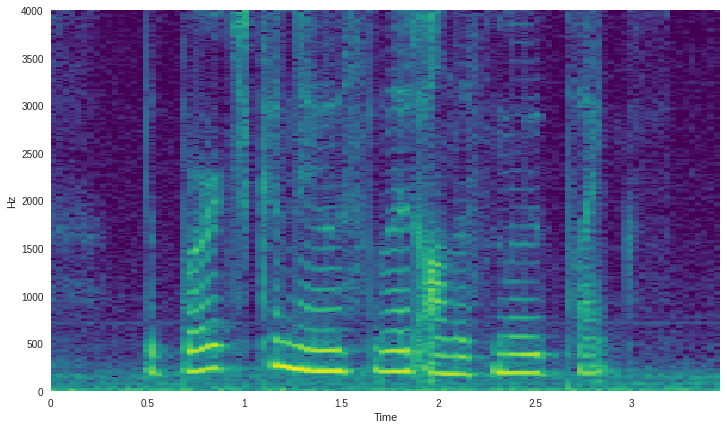

In [57]:
# computing with LIBROSA
X = librosa.stft(signal, n_fft= NFFT, hop_length= hop_length, win_length= frame_length, window='hamming', center=False)
Xmag = librosa.amplitude_to_db(np.abs(X))

plt.figure(figsize=(12,7))
librosa.display.specshow(Xmag, sr=sample_rate, hop_length= hop_length, x_axis='time', y_axis='linear', cmap='viridis')